# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_file = "Iowa_Liquor_sales_sample_10pct.csv"
## Load the data into a DataFrame
# pd.read_csv()
booze_df = pd.read_csv(data_file)

booze_df["Date"] = pd.to_datetime(booze_df["Date"])
booze_df.head(20)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


I'm going to do some data cleanup before proceeding.

In [26]:
# I think it will be important to hang on to the category and item descriptions as well as county names for
# lookup later. Going to set those up.

category_df = booze_df.groupby('Category')[['Category', 'Category Name']]
desc_df = booze_df.groupby('Item Number')[['Item Number', 'Item Description']]
county_df = booze_df.groupby('County Number')[['County Number', 'County']]

# Found a file of Iowa zip codes including county and city information, so can drop those columns and join
# as needed for display purposes later.

zip_df = pd.read_csv("IowaZip.csv").set_index('ZipCode')
zip_df.head()

,City,County
ZipCode,,
50001,Ackworth,Warren
50002,Adair,Adair
50003,Adel,Dallas
50005,Albion,Marshall
50006,Alden,Hardin


In [27]:
# Drop columns that I don't need given the available data I've either found elsewhere
# Or split off. Makes life simpler

del booze_df["Category Name"]
del booze_df["Item Description"]
del booze_df["County"]

# And easily calculated one that I don't expect to use anyway

del booze_df["Volume Sold (Gallons)"]

booze_df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,9.0,1051100.0,55,54436,750,$4.50,$6.75,12,$81.00,9.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,1011100.0,395,27605,750,$13.75,$20.63,2,$41.26,1.5
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,1011200.0,65,19067,1000,$12.59,$18.89,24,$453.36,24.0
3,2016-02-03,2501,AMES,50010,85.0,1071100.0,395,59154,1750,$9.50,$14.25,6,$85.50,10.5
4,2015-08-18,3654,BELMOND,50421,99.0,1031080.0,297,35918,1750,$7.20,$10.80,12,$129.60,21.0


In [28]:
# Clean up numbers

# Get rid of $ and make the numbers floats
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    booze_df[col] = booze_df[col].apply(lambda x: float(x[1:]))
     

In [29]:
# Get rid of invalid rows
# OK, not the optimal way to clean up, but in a dataset this large, probably acceptable

booze_df = booze_df.dropna()

# Make other values int where they should be

booze_df["County Number"] = booze_df["County Number"].astype(int)
booze_df["Category"] = booze_df["Category"].astype(int)

booze_df.head(20)   

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.00
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.50
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.00
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.50
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.00
5,2015-04-20,2569,CEDAR RAPIDS,52402,57,1041100,205,31473,1750,13.32,19.98,6,119.88,10.50
6,2015-08-05,2596,OTTUMWA,52501,90,1051010,85,52806,750,6.66,9.99,3,29.97,2.25
7,2015-06-25,3456,CLEAR LAKE,50428,17,1012100,65,10628,1750,15.75,23.63,2,47.26,3.50
8,2016-01-04,4757,BONDURANT,50035,77,1032080,370,34006,750,11.49,17.24,4,68.96,3.00
9,2015-11-10,4346,SHELLSBURG,52332,6,1081315,65,82610,1000,7.62,11.43,2,22.86,2.00


In [30]:
# Create a Year column, to more easily split the data.

booze_df['Year'] = booze_df['Date'].map(lambda x: x.year)

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
# Margin
booze_df["Margin"] = (booze_df["State Bottle Retail"] - booze_df["State Bottle Cost"]) * booze_df["Bottles Sold"]
booze_df["Price per Liter"] = booze_df["Sale (Dollars)"] / booze_df["Volume Sold (Liters)"]
booze_df.head()

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year,Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2015,27.00,9.000000
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,2016,13.76,27.506667
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,2016,151.20,18.890000
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2016,28.50,8.142857
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,2015,43.20,6.171429


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [32]:
# Sales by County

county_df = booze_df.groupby(by=["County Number", "Year"], as_index=False)
# Compute sums, means
county_df = county_df.agg({"Sale (Dollars)": [np.sum, np.mean],                           
                           "Volume Sold (Liters)": [np.sum, np.mean],
                           "Bottles Sold": [np.sum, np.mean],       
                           "Margin": [np.sum, np.mean],
                           "Price per Liter": np.mean})
county_df.head()

County Number  Year Price per Liter Bottles Sold              Margin  \
                                 mean          sum      mean       sum   
0             1  2015       15.370692         3780  8.008475  14620.89   
1             1  2016       16.873535          873  7.725664   3954.40   
2             2  2015       17.324104          754  3.989418   3417.67   
3             2  2016       15.969329          201  4.466667    733.32   
4             3  2015       15.460701         6020  7.235577  26770.24   

             Sale (Dollars)             Volume Sold (Liters)            
        mean            sum        mean                  sum      mean  
0  30.976462       43747.18   92.684703              3510.22  7.436907  
1  34.994690       11834.16  104.727080               851.87  7.538673  
2  18.082910       10245.14   54.207090               822.28  4.350688  
3  16.296000        2196.57   48.812667               159.10  3.535556  
4  32.175769       79918.47   96.055853              6290.75  7.560998

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


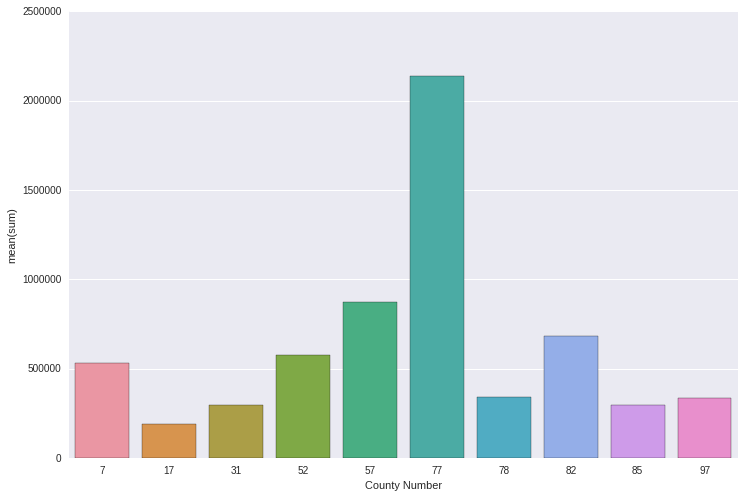

In [76]:
# Get 2015
county_2015_df = county_df[county_df['Year'] == 2015]

# Get top 10 counties by total margin
county_2015_df = county_2015_df.sort([('Margin', 'sum')], ascending = False)
county_2015_margin = county_2015_df.head(10)
plt.figure(figsize=(12,8))
sns.barplot(county_2015_margin['County Number'], county_2015_margin['Margin']['sum'])

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


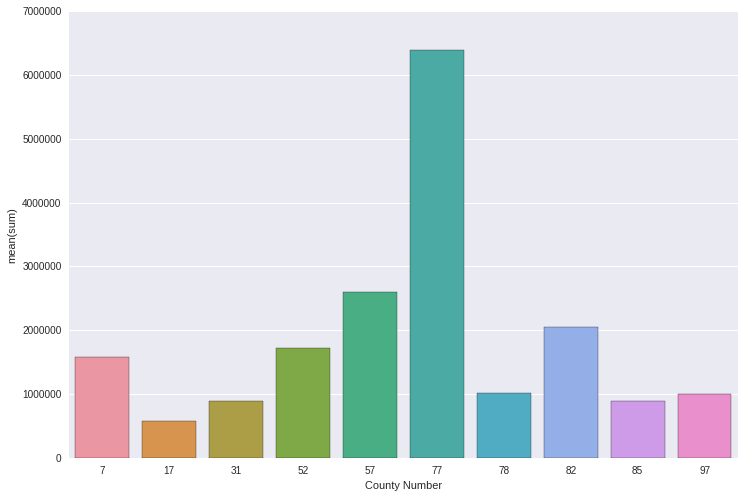

In [77]:
# Get top 10 counties by total sales
county_2015_df = county_2015_df.sort([('Sale (Dollars)', 'sum')], ascending = False)
county_2015_sales = county_2015_df.head(10)
plt.figure(figsize=(12,8))
sns.barplot(county_2015_sales['County Number'], county_2015_sales['Sale (Dollars)']['sum'])

# Obvious conclusion

Margin and Sales are very closely related.

In [78]:
# Sales by Store

store_df = booze_df.groupby(by=["County Number", "Store Number", "Year"], as_index=False)
# Compute sums, means
store_df = store_df.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Bottles Sold": [np.sum, np.mean],       
                   "Margin": [np.sum, np.mean],
                   "Price per Liter": np.mean})
store_df.head()

County Number Store Number  Year Price per Liter Bottles Sold             \
                                              mean          sum       mean   
0             1         3461  2015       13.737268         1037   6.522013   
1             1         3461  2016       17.058127          305   7.439024   
2             1         3969  2015       25.432917          136  17.000000   
3             1         4317  2015       15.222313          777   5.842105   
4             1         4317  2016       17.137225          158   5.448276   

    Margin            Sale (Dollars)             Volume Sold (Liters)  \
       sum       mean            sum        mean                  sum   
0  3926.31  24.693774       11754.24   73.926038              1095.29   
1  1236.27  30.152927        3686.68   89.919024               310.87   
2   464.68  58.085000        1393.94  174.242500                86.85   
3  3337.08  25.090827        9983.13   75.061128               830.50   
4   944.55  32.570690        2832.74   97.680690               162.25   

              
        mean  
0   6.888616  
1   7.582195  
2  10.856250  
3   6.244361  
4   5.594828

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


     Store Number County Number     Margin             Sale (Dollars)  \
                                       sum        mean            sum   
1645         2633            77  333816.91  166.908455     1000783.30   
1911         4829            77  293196.99  159.693350      878812.70   
1174         3385            57  147884.62  309.382050      441983.55   
981          2512            52  140143.46  101.848445      419746.83   
1677         3420            77  117593.34  345.862765      352020.66   
2192         3952            82  111230.21  121.297939      333311.98   
528          3814            25   83004.48  691.704000      247417.42   
2168         3354            82   80244.69  255.556338      240365.94   
1185         3773            57   77525.08   83.181416      232460.41   
990          2670            52   75853.72   63.316962      227167.07   

                   
             mean  
1645   500.391650  
1911   478.656155  
1174   924.651778  
981    305.048568  
167

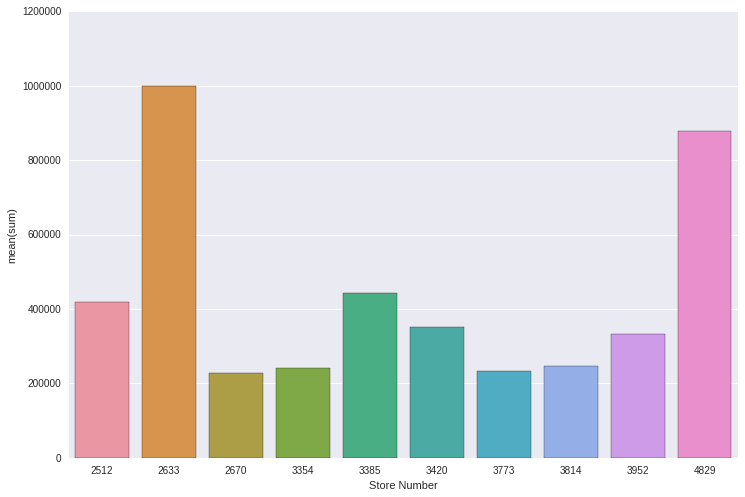

In [79]:
store_2015_df = store_df[store_df['Year'] == 2015]
store_2015_df = store_2015_df.sort([('Sale (Dollars)', 'sum')], ascending = False)
store_2015_sales = store_2015_df.head(10)
plt.figure(figsize=(12,8))
sns.barplot(store_2015_sales['Store Number'], store_2015_sales['Sale (Dollars)']['sum'])
print store_2015_sales[['Store Number', 'County Number', 'Margin', 'Sale (Dollars)']]

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


     Store Number County Number     Margin             Sale (Dollars)  \
                                       sum        mean            sum   
1645         2633            77  333816.91  166.908455     1000783.30   
1911         4829            77  293196.99  159.693350      878812.70   
1174         3385            57  147884.62  309.382050      441983.55   
981          2512            52  140143.46  101.848445      419746.83   
1677         3420            77  117593.34  345.862765      352020.66   
2192         3952            82  111230.21  121.297939      333311.98   
528          3814            25   83004.48  691.704000      247417.42   
2168         3354            82   80244.69  255.556338      240365.94   
1185         3773            57   77525.08   83.181416      232460.41   
990          2670            52   75853.72   63.316962      227167.07   

                   
             mean  
1645   500.391650  
1911   478.656155  
1174   924.651778  
981    305.048568  
167

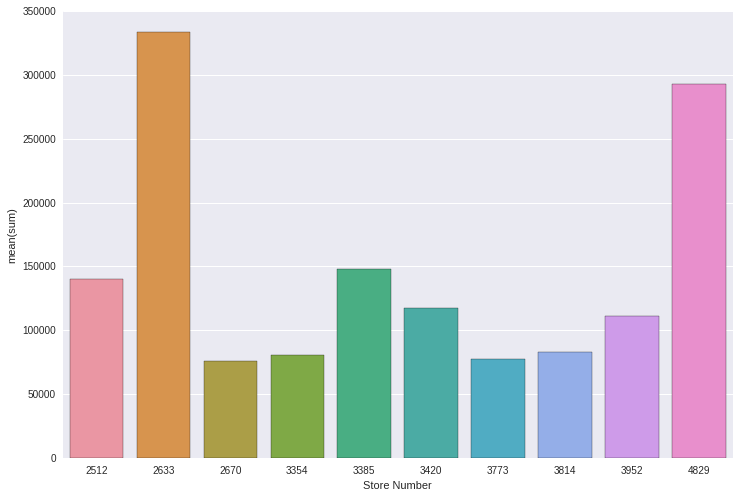

In [80]:
store_2015_df = store_2015_df.sort([('Margin', 'sum')], ascending = False)
store_2015_margin = store_2015_df.head(10)
plt.figure(figsize=(12,8))
sns.barplot(store_2015_margin['Store Number'], store_2015_margin['Margin']['sum'])
print store_2015_margin[['Store Number', 'County Number', 'Margin', 'Sale (Dollars)']]

## Some further validation

I validated this by looking at individual stores. Generally speaking, the stores with the best sales and margins were within the counties with best sales and margins. This is an important thing to note, because it would tend to disprove the possible hypothesis that counties with low sales are low because a lack of available shopping outlets (perhaps causing people to shop in adjacent counties) rather than because demand is low. The fact that individual stores track well with the counties they are in, provides some evidence that the "big" counties are in fact big for a reason and are the likeliest targets for further investment.

Of the top 10 stores in the state, only one was not in the top 10 counties. In fact, nine of the top 10 stores were in the top four counties. This tends to reinforce the case for investment in those counties.

Interesting option for future analysis here.

In [58]:
# Filter by our start and end dates
booze_df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (booze_df['Date'] >= start_date) & (booze_df['Date'] <= end_date)
sales_df = booze_df[mask]

# Group by store name
sales_df = sales_df.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales_df = sales_df.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales_df.columns = [' '.join(col).strip() for col in sales_df.columns.values]
# Rename columns
sales_df.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales_df.head()

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,9731.85,18.466509,92.671879
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,6891.37,17.580026,95.217347
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430


In [46]:
# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
booze_df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (booze_df['Date'] >= start_date) & (booze_df['Date'] <= end_date)
df2 = booze_df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales_df["2015 Sales Q1"] = df2["Sale (Dollars)"]

# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
booze_df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (booze_df['Date'] >= start_date) & (booze_df['Date'] <= end_date)
df2 = booze_df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales_df["2016 Sales Q1"] = df2["Sale (Dollars)"]

sales_df.head()


/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,9731.85,18.466509,92.671879,39287.29,30523.75
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932,2833.25,2065.90
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,6891.37,17.580026,95.217347,24272.57,27856.11
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277,2003.46,904.66
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430,5856.41,5588.50


(0, 50000)

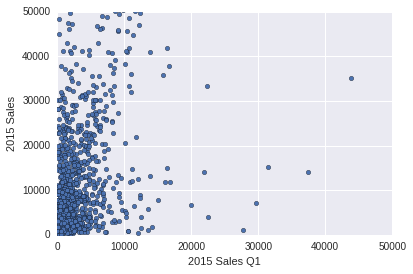

In [47]:
sales_df.plot(kind='scatter', x="2015 Sales Q1", y="2016 Sales Q1");
plt.xlim(0, 50000)
plt.ylim(0, 50000)

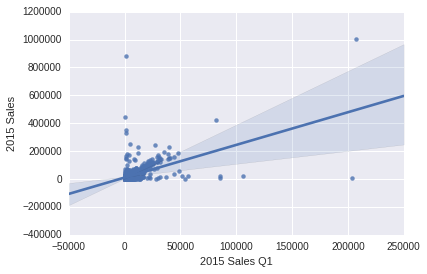

In [48]:
sns.regplot(x="2015 Sales Q1", y="2015 Sales", data=sales_df)

In [60]:
booze_df2 = booze_df[['Date', 'County Number', 'Store Number', 'State Bottle Cost', 'State Bottle Retail',
                      'Bottles Sold', 'Volume Sold (Liters)', 'Sale (Dollars)']]

## Record your findings

The key finding, as noted above, is that there are nine counties in the state that collectively show the strongest sales and margins. Those are counties 25, 31, 52, 56, 77, 78, and 82, 94 and 97. Further analysis will focus on them.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [103]:
# Going to go back to the main dataset and select out the counties of interest:
top_counties = [7, 17, 31, 52, 57, 77, 78, 82, 85, 97]

booze_df2 = booze_df[booze_df['County Number'].isin(top_counties)]

# Then split by year
booze2_2015 = booze_df2[booze_df2['Year'] == 2015]
booze2_2016 = booze_df2[booze_df2['Year'] == 2016]

# I want to look at the data by week

booze2_2015['Week'] = booze2_2015['Date'].apply(lambda x: ((x - pd.Timestamp('2015-01-01')).days) / 7 + 1)
booze2_2016['Week'] = booze2_2016['Date'].apply(lambda x: ((x - pd.Timestamp('2016-01-01')).days) / 7 + 1)

county_2015 = booze2_2015.groupby(by=["County Number", "Year", "Week"], as_index=False)
county_2015 = county_2015.agg({"Sale (Dollars)": np.sum,                          
                               "Margin": np.sum,})

county_2016 = booze2_2016.groupby(by=["County Number", "Year", "Week"], as_index=False)
county_2016 = county_2016.agg({"Sale (Dollars)": np.sum,                          
                               "Margin": np.sum,})

# Create cumulative sales and margin by week for 2015

new_2015 = pd.DataFrame(columns=['County Number', 'Year', 'Week', 'Margin', 'Sale (Dollars)','Cum_Margin', 'Cum_Sales'])
for county in top_counties:
    temp_df = county_2015[county_2015['County Number'] == county]
    
    temp_df['Cum_Margin'] = temp_df['Margin'].cumsum()
    temp_df['Cum_Sales'] = temp_df['Sale (Dollars)'].cumsum()
    
    new_2015 = pd.concat([new_2015, temp_df])
    
# Same for 2016

new_2016 = pd.DataFrame(columns=['County Number', 'Year', 'Week', 'Margin', 'Sale (Dollars)','Cum_Margin', 'Cum_Sales'])
for county in top_counties:
    temp_df = county_2016[county_2016['County Number'] == county]
    
    temp_df['Cum_Margin'] = temp_df['Margin'].cumsum()
    temp_df['Cum_Sales'] = temp_df['Sale (Dollars)'].cumsum()
    
    new_2016 = pd.concat([new_2016, temp_df])

/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [107]:
# Get Q1 2015

new_2015_Q1 = new_2015[new_2015['Week'] < 14]

new_2015_Q1.head(30)


,County Number,Year,Week,Margin,Sale (Dollars),Cum_Margin,Cum_Sales
0,7.0,2015.0,1.0,4524.23,13538.79,4524.23,13538.79
1,7.0,2015.0,2.0,7676.98,22986.70,12201.21,36525.49
2,7.0,2015.0,3.0,6344.81,19004.65,18546.02,55530.14
3,7.0,2015.0,4.0,7255.20,21743.39,25801.22,77273.53
4,7.0,2015.0,5.0,7398.79,22161.20,33200.01,99434.73
5,7.0,2015.0,6.0,12437.48,36711.06,45637.49,136145.79
6,7.0,2015.0,7.0,12621.10,37769.31,58258.59,173915.10
7,7.0,2015.0,8.0,8449.46,25282.97,66708.05,199198.07
8,7.0,2015.0,9.0,9405.53,28149.86,76113.58,227347.93
9,7.0,2015.0,10.0,10574.60,31693.77,86688.18,259041.70


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [6]:
from sklearn import linear_model
clf = linear_model.LinearRegression()



## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

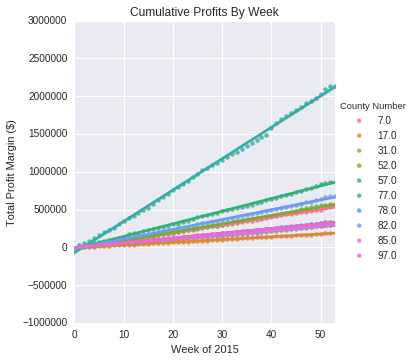

In [110]:
ax = sns.lmplot(x='Week',
                y='Cum_Margin',
                hue='County Number', data=new_2015)

ax.set(xlabel="Week of 2015",
      ylabel="Total Profit Margin ($)",
      title="Cumulative Profits By Week")
plt.xlim(0,53)
#plt.ylim(0,5000000)
plt.show()


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.